<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/15_2_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]
x_train, y_train = x_train[:50000, :], y_train[:50000]

# 데이터 표준화
import numpy as np
mean = np.mean(x_train, axis=0)
std = np.std(x_train)

x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard(log_dir='logs/{}'.format(time.asctime()))]

In [ ]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot), 
                  callbacks=callback_list)

Epoch 1/20
  1/782 [..............................] - ETA: 0s - loss: 2.3839 - acc: 0.0781WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
782/782 [==============================] - 3s 4ms/step - loss: 0.1355 - acc: 0.9572 - val_loss: 0.0549 - val_acc: 0.9830
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0495 - acc: 0.9849 - val_loss: 0.0420 - val_acc: 0.9874
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0361 - acc: 0.9887 - val_loss: 0.0343 - val_acc: 0.9908
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0366 - val_acc: 0.9905
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0447 -

In [ ]:
model.layers

In [ ]:
model.layers[0]

In [ ]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-6.45809919e-02, -3.94892134e-02, -5.92159256e-02,
            5.43226711e-02,  3.06482078e-04, -4.58846092e-02,
            4.40453142e-02,  5.97009063e-02,  4.62461673e-02,
            1.58494025e-01, -3.74507420e-02, -1.23525513e-02,
           -1.55124636e-02,  6.10787049e-02,  1.22375851e-02,
            8.35694838e-03,  3.16182822e-02,  7.21551627e-02,
           -6.57848716e-02,  1.37997884e-02, -1.36338040e-01,
            1.08313128e-01, -3.92340347e-02,  2.06476785e-02,
            4.70830686e-03, -4.36631292e-02,  2.02285927e-02,
            2.81588198e-03,  1.78182367e-02, -7.91110005e-03,
           -1.11180432e-02, -9.48915631e-03]],
 
         [[-1.51869729e-01, -2.74925604e-02,  2.76544821e-02,
            8.05919543e-02, -5.88586321e-03,  1.67187192e-02,
           -1.39089957e-01, -3.21649611e-02, -2.14017369e-02,
           -2.94150412e-02,  5.11189066e-02,  9.33155604e-03,
         

In [ ]:
# conv2d 확인

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)

In [ ]:
conv2d_out = conv2d_1.predict(x_train_c[[0]])

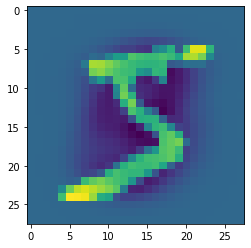

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train_c[0,:,:,0])

In [ ]:
conv2d_out.shape

(1, 24, 24, 32)

In [ ]:
y_train[0]

5

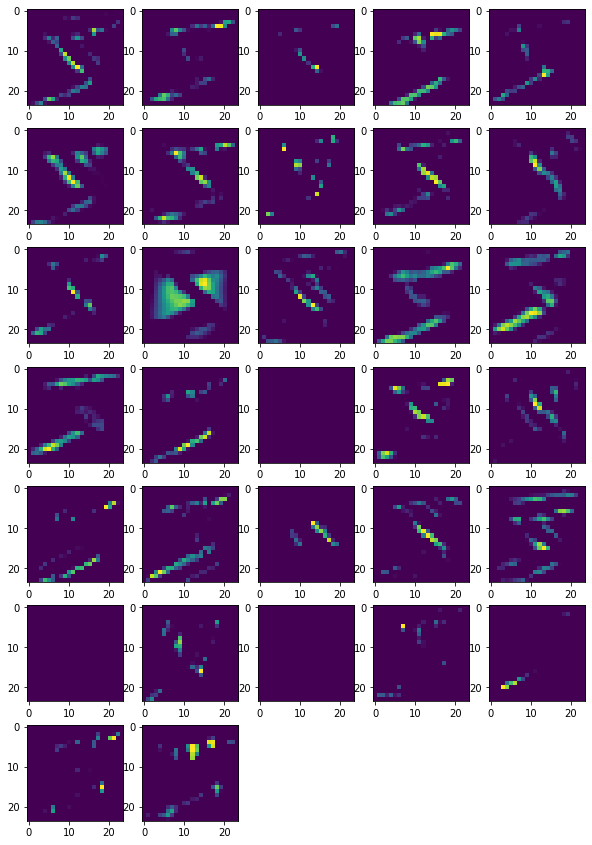

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i])

In [ ]:
conv2d_out = conv2d_1.predict(x_train_c[[1]])

In [ ]:
y_train[1]

0

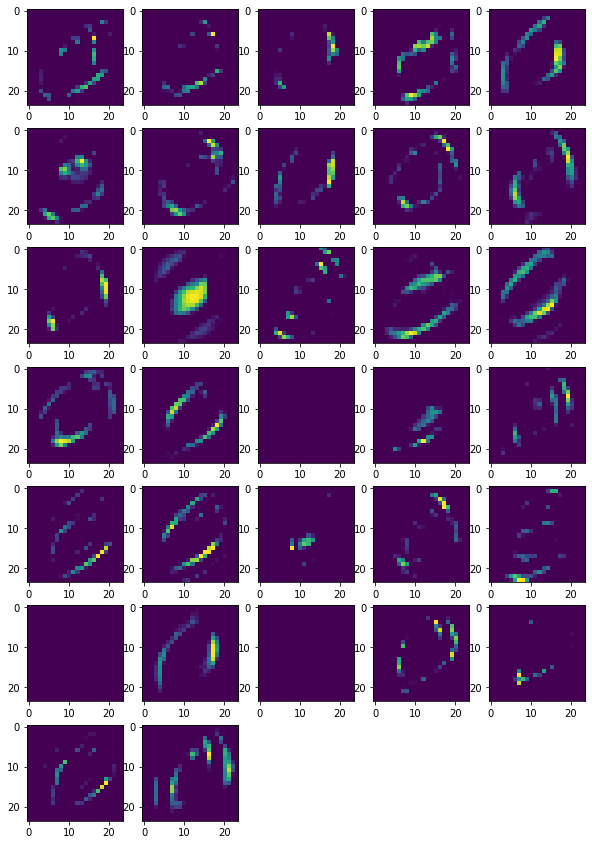

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i])

In [ ]:
model.layers[0].kernel

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
array([[[[-0.02017048,  0.0478558 , -0.03210869,  0.02611971,
          -0.00431   ,  0.03950672,  0.06466182, -0.00397368,
          -0.11041931,  0.06188212,  0.01574222,  0.03677328,
          -0.04605595, -0.03746496, -0.03887537,  0.04325863,
           0.00357916, -0.04583003, -0.03052464,  0.09014533,
           0.04599913, -0.00488481, -0.01495958,  0.05279433,
           0.03684372,  0.04527408, -0.02146533, -0.00820515,
          -0.00734591,  0.02714651,  0.00915055, -0.07834546]],

        [[-0.09393349, -0.02126384,  0.01402647, -0.03497479,
          -0.17356831,  0.03652054,  0.07733518, -0.02692553,
           0.10061886, -0.05161655,  0.06971796,  0.03024792,
           0.02340297,  0.03847373, -0.03421345,  0.0152804 ,
          -0.10428707, -0.00796009,  0.15090361,  0.10961545,
           0.10992216,  0.09897673, -0.01040884, -0.08578911,
          -0.00381391,  0.05370897,  0.00187707, -0.0784

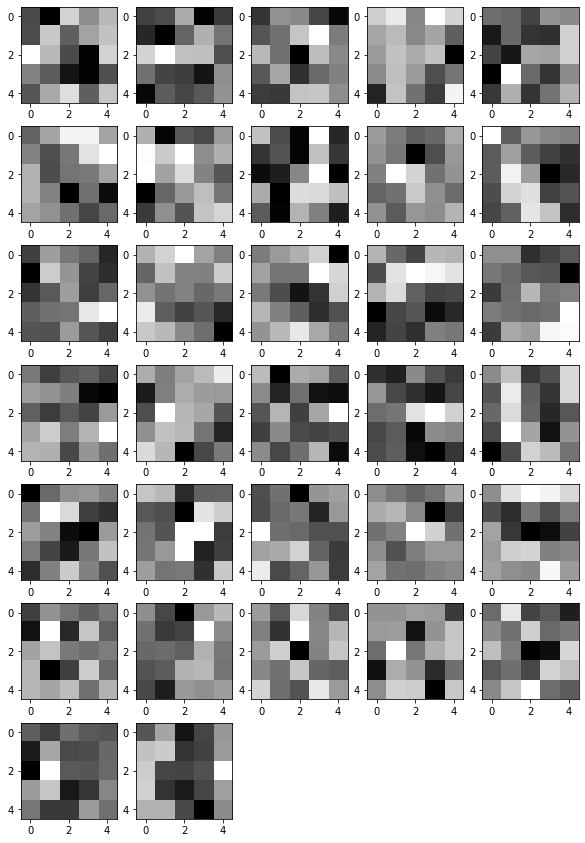

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')

In [ ]:
conv2d_2 = models.Model(inputs=model.input, outputs=model.layers[2].output)

In [ ]:
conv2d_out = conv2d_2.predict(x_train_c[[0]])

In [ ]:
y_train[0]

5

In [ ]:
conv2d_out.shape

(1, 8, 8, 64)

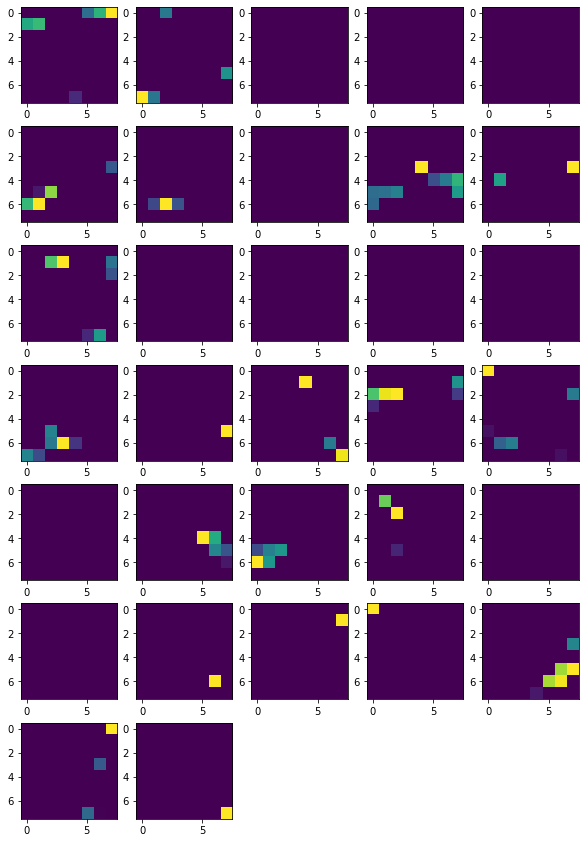

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i])

In [ ]:
maxpool_1 = models.Model(inputs=model.input, outputs=model.layers[1].output)

In [ ]:
maxpool_out = maxpool_1.predict(x_train_c[[0]])

In [ ]:
maxpool_out.shape

(1, 12, 12, 32)

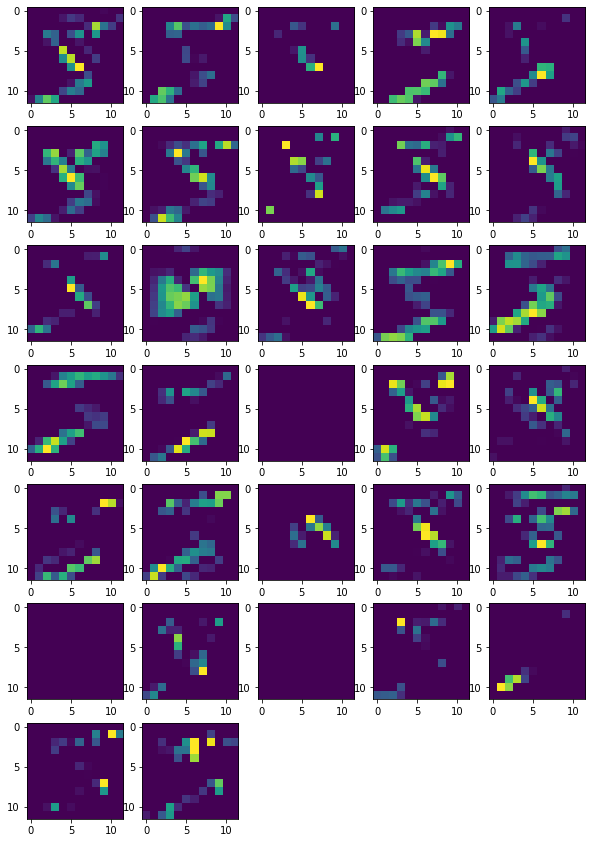

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i])